<a href="https://colab.research.google.com/github/kellykhy/DL2022-1/blob/main/Team_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# final-term team quiz on AI for Deep Learning

- Name:  
- ID Number: 

------------------------------------------
Firstly, copy this notebook to your google drive.  
Secondly, click 'Runtime' tab, 'Change runtime type' tab, and change 'Hardware accelerator' as 'GPU.'  
Now you are ready to go, good luck! :) 


In [1]:
import tensorflow as tf
tf.keras.__version__

'2.8.0'

In [2]:
from tensorflow import keras

## Q1 Use Mnist data


In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


(Q1-1) [20] Create a CNN model with the structure shown in the figure below. 

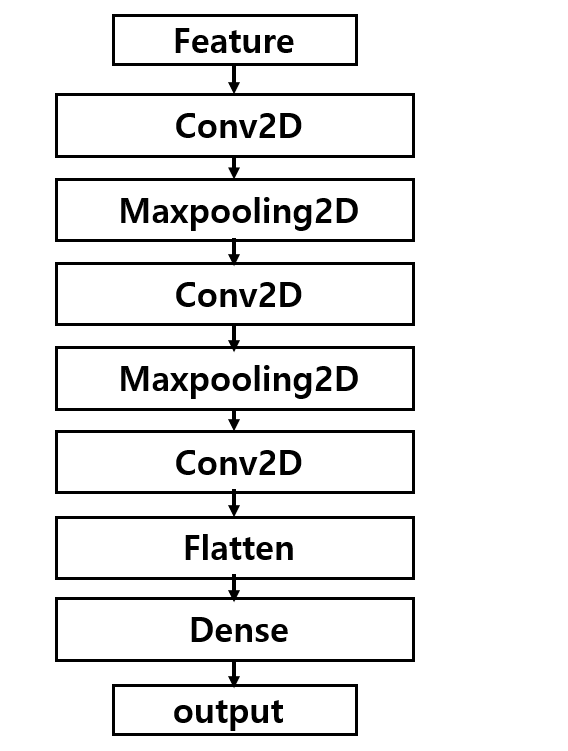

- Set filter size of Convolution layers as 16, 32, and 32.
- Set kernel size of Convolution layer as (3,3), use zero padding, and use stride as 1 for all convolution layers. 
- Use 'relu' activation for all convolution layers. 
- Use 2 by 2 Maxpooling with stride 2.
- Set the number of filters in the dense layer after the flatten layer as 50, and use the 'relu' function for activation.


In [22]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=16, kernel_size=3, strides=1, activation="relu", padding="same")(inputs)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu", padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(50, activation="relu")(x)
outputs = layers.Dense(10, activation = "sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

(Q1-2) [20] Compile and fit your model
 - Use Adam optimizer
 - Use categorical cross entropy loss
 - Use accuracy as for the evaluation metric
 - Use epoch as 5 and batch size as 32

In [11]:
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
history = model.fit(
    x_train,
    train_labels,
    epochs=5,
    batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1487 - accuracy: 0.9548
Epoch 2/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0472 - accuracy: 0.9853
Epoch 3/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0341 - accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0258 - accuracy: 0.9915
Epoch 5/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0204 - accuracy: 0.9933


(Q1-3) [20] Try Data augmentation for training 

- Apply RandomFlip (horizontal flip) and RandomRotation. 


In [15]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

In [19]:
inputs = keras.Input(shape=(28, 28, 1))
x = data_augmentation(inputs)
x = layers.Conv2D(filters=16, kernel_size=3, strides=1, activation="relu", padding="same")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu", padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(50, activation="relu")(x)
outputs = layers.Dense(10, activation = "sigmoid")(x)
augmentation_model = keras.Model(inputs=inputs, outputs=outputs)

In [20]:
augmentation_model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
history = augmentation_model.fit(
    x_train,
    train_labels,
    epochs=5,
    batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0185 - accuracy: 0.9943
Epoch 2/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0157 - accuracy: 0.9948
Epoch 3/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0129 - accuracy: 0.9958
Epoch 4/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0095 - accuracy: 0.9969
Epoch 5/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0100 - accuracy: 0.9966


In [21]:
test_loss, test_acc = augmentation_model.evaluate(x_test, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 3s 9ms/step - loss: 0.0327 - accuracy: 0.9915
Test accuracy: 0.992


## Q2 Use Jena climate data

In [ ]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2022-06-06 06:06:01--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.168.29
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.168.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  65.8MB/s    in 0.2s    

2022-06-06 06:06:01 (65.8 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [ ]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]

import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]

ploting temperature

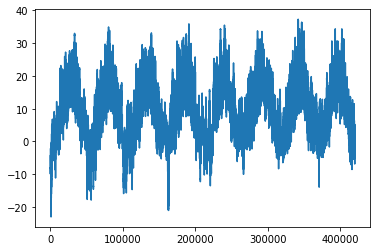

In [ ]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)

(Q2-1) [20] Visualize first 7 days of temperature

Computing the number of samples we'll use for each data split

In [ ]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


Normalizing data

In [ ]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

Data preprocessing.

In [ ]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

In [ ]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break

samples shape: (256, 120, 14)
targets shape: (256,)


common sense baseline

In [ ]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 2.44
Test MAE: 2.62


(Q2-2) [20] Modify the code below to perform Bidirectional LSTM using 16 filters. Add dropout layer with dropout probability 0.5.   


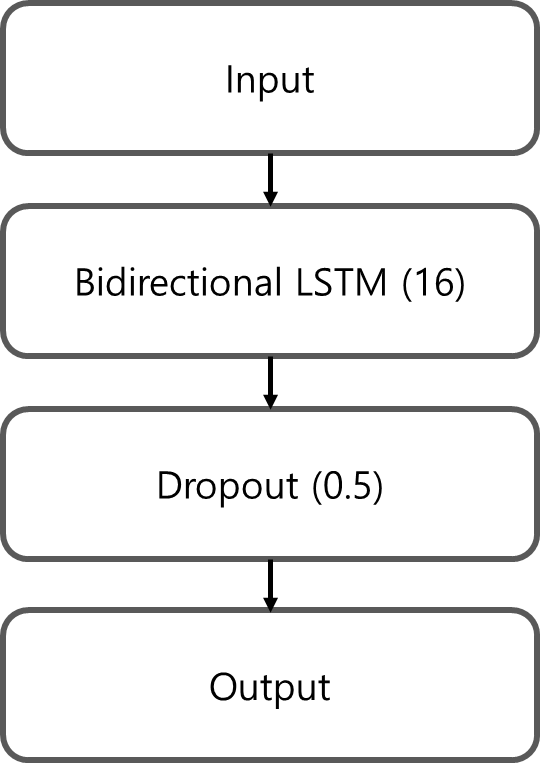 

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=3,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_dense.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/3
819/819 [==============================] - 42s 51ms/step - loss: 13.5275 - mae: 2.8512 - val_loss: 13.4187 - val_mae: 2.8989
Epoch 2/3
819/819 [==============================] - 42s 51ms/step - loss: 9.5772 - mae: 2.4362 - val_loss: 11.8028 - val_mae: 2.7173
Epoch 3/3
405/405 [==============================] - 14s 33ms/step - loss: 11.8330 - mae: 2.7059
Test MAE: 2.71
